## DeepKriging + PS on Durham data

Let's test our DeepKriging model (which adjusts for preferential sampling via MSE+BCE loss function) on the Durham data.

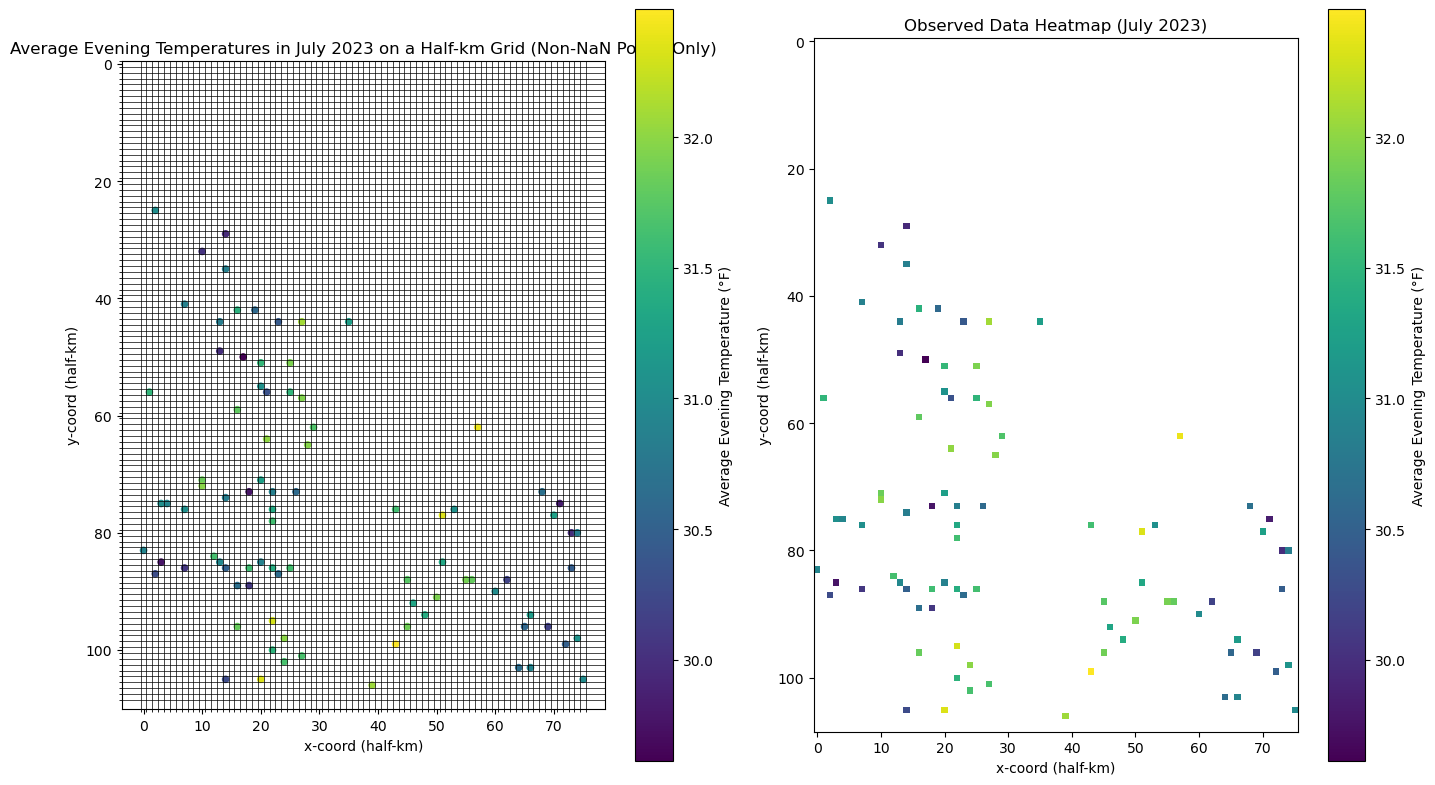

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = np.load('july2023_eve.npy')

# Create a figure with two horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# 1) Plot only the non-NaN data points on the first subplot
ys, xs, vals = [], [], []
for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        if not np.isnan(data[y, x]):
            xs.append(x)
            ys.append(y)
            vals.append(data[y, x])

# Plot the non-NaN points with a scatter plot on the first subplot
sc = axes[0].scatter(np.array(xs), np.array(ys), c=np.array(vals), cmap='viridis', s=20)
fig.colorbar(sc, ax=axes[0], label="Average Evening Temperature (°F)")

# Set grid lines to match the 109 x 76 grid structure on the first subplot
axes[0].set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
axes[0].set_yticks(np.arange(-0.5, data.shape[0], 1), minor=True)
axes[0].grid(which="minor", color="black", linestyle='-', linewidth=0.5)

# Set aspect to equal for consistent cell dimensions on the first subplot
axes[0].set_aspect('equal')

# Invert the y-axis for the scatter plot to match the imshow orientation
axes[0].invert_yaxis()

# Label axes and title for the first subplot
axes[0].set_title("Average Evening Temperatures in July 2023 on a Half-km Grid (Non-NaN Points Only)")
axes[0].set_xlabel("x-coord (half-km)")
axes[0].set_ylabel("y-coord (half-km)")

# 2) Visualize the observed data (heatmap) on the second subplot
im = axes[1].imshow(data, cmap='viridis', aspect='equal')
fig.colorbar(im, ax=axes[1], label="Average Evening Temperature (°F)")

# Label axes and title for the second subplot
axes[1].set_title("Observed Data Heatmap (July 2023)")
axes[1].set_xlabel("x-coord (half-km)")
axes[1].set_ylabel("y-coord (half-km)")

# Display the plots
plt.tight_layout()  # Adjust spacing between the plots
plt.show()

# note: imshow() displays images with the origin at the top-left corner (by default).








In [2]:
from itertools import product

all_grid_cell_indices = list(product(np.arange(data.shape[0]), np.arange(data.shape[1])))

print(np.arange(data.shape[0]))
print(np.arange(data.shape[1]))

for i in product(np.arange(data.shape[0]), np.arange(data.shape[1])):
    print(i)

print(len(all_grid_cell_indices))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(0, 40)
(0, 4

In [3]:
observed_grid_cell_indices = [(y, x) for y, x in all_grid_cell_indices if not np.isnan(data[y, x])]

print(len(observed_grid_cell_indices))

for i in observed_grid_cell_indices:
    print(i)

88
(25, 2)
(29, 14)
(32, 10)
(35, 14)
(41, 7)
(42, 16)
(42, 19)
(44, 13)
(44, 23)
(44, 27)
(44, 35)
(49, 13)
(50, 17)
(51, 20)
(51, 25)
(55, 20)
(56, 1)
(56, 21)
(56, 25)
(57, 27)
(59, 16)
(62, 29)
(62, 57)
(64, 21)
(65, 28)
(71, 10)
(71, 20)
(72, 10)
(73, 18)
(73, 22)
(73, 26)
(73, 68)
(74, 14)
(75, 3)
(75, 4)
(75, 71)
(76, 7)
(76, 22)
(76, 43)
(76, 53)
(77, 51)
(77, 70)
(78, 22)
(80, 73)
(80, 74)
(83, 0)
(84, 12)
(85, 3)
(85, 13)
(85, 20)
(85, 51)
(86, 7)
(86, 14)
(86, 18)
(86, 22)
(86, 25)
(86, 73)
(87, 2)
(87, 23)
(88, 45)
(88, 55)
(88, 56)
(88, 62)
(89, 16)
(89, 18)
(90, 60)
(91, 50)
(92, 46)
(94, 48)
(94, 66)
(95, 22)
(96, 16)
(96, 45)
(96, 65)
(96, 69)
(98, 24)
(98, 74)
(99, 43)
(99, 72)
(100, 22)
(101, 27)
(102, 24)
(103, 64)
(103, 66)
(105, 14)
(105, 20)
(105, 75)
(106, 39)


In [4]:
unobserved_grid_cell_indices = [(y, x) for y, x in all_grid_cell_indices if np.isnan(data[y, x])]

print(len(unobserved_grid_cell_indices))

for i in unobserved_grid_cell_indices[:50]:
    print(i)

8196
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(0, 40)
(0, 41)
(0, 42)
(0, 43)
(0, 44)
(0, 45)
(0, 46)
(0, 47)
(0, 48)
(0, 49)


The data is plotted on a 109 row x 76 col grid, with each grid cell being a half-km square.


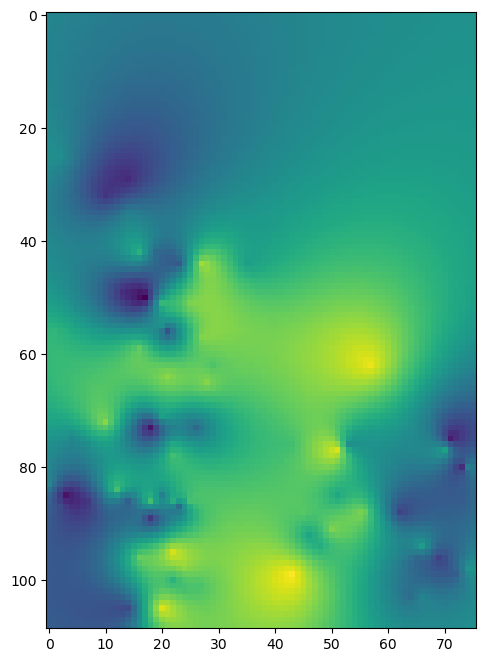

In [5]:
# Let's open up Zach's ICAR+PS predictions:
icar_ps_data = np.load('ps_mu.npy')

# plot icar_ps_data
plt.figure(figsize=(12, 8))
plt.imshow(icar_ps_data, cmap='viridis', aspect='equal')

print("The data is plotted on a 109 row x 76 col grid, with each grid cell being a half-km square.")


We have the y_trues for the observed data points, but we are obviously missing the y_trues for the unobserved data points. This is where we'll use Zach's ICAR+PS model predictions as "ground truth" values, so we can train our model in a way that minimizes loss. The goal of this is to see if we can recreate the same results as Zach's model.

88
8196
NaN count before updating unobserved cells: 8196
Non-NaN count before updating unobserved cells: 88
Number of non-NaN temp_avg values: 8284
Total number of grid cells: 8284


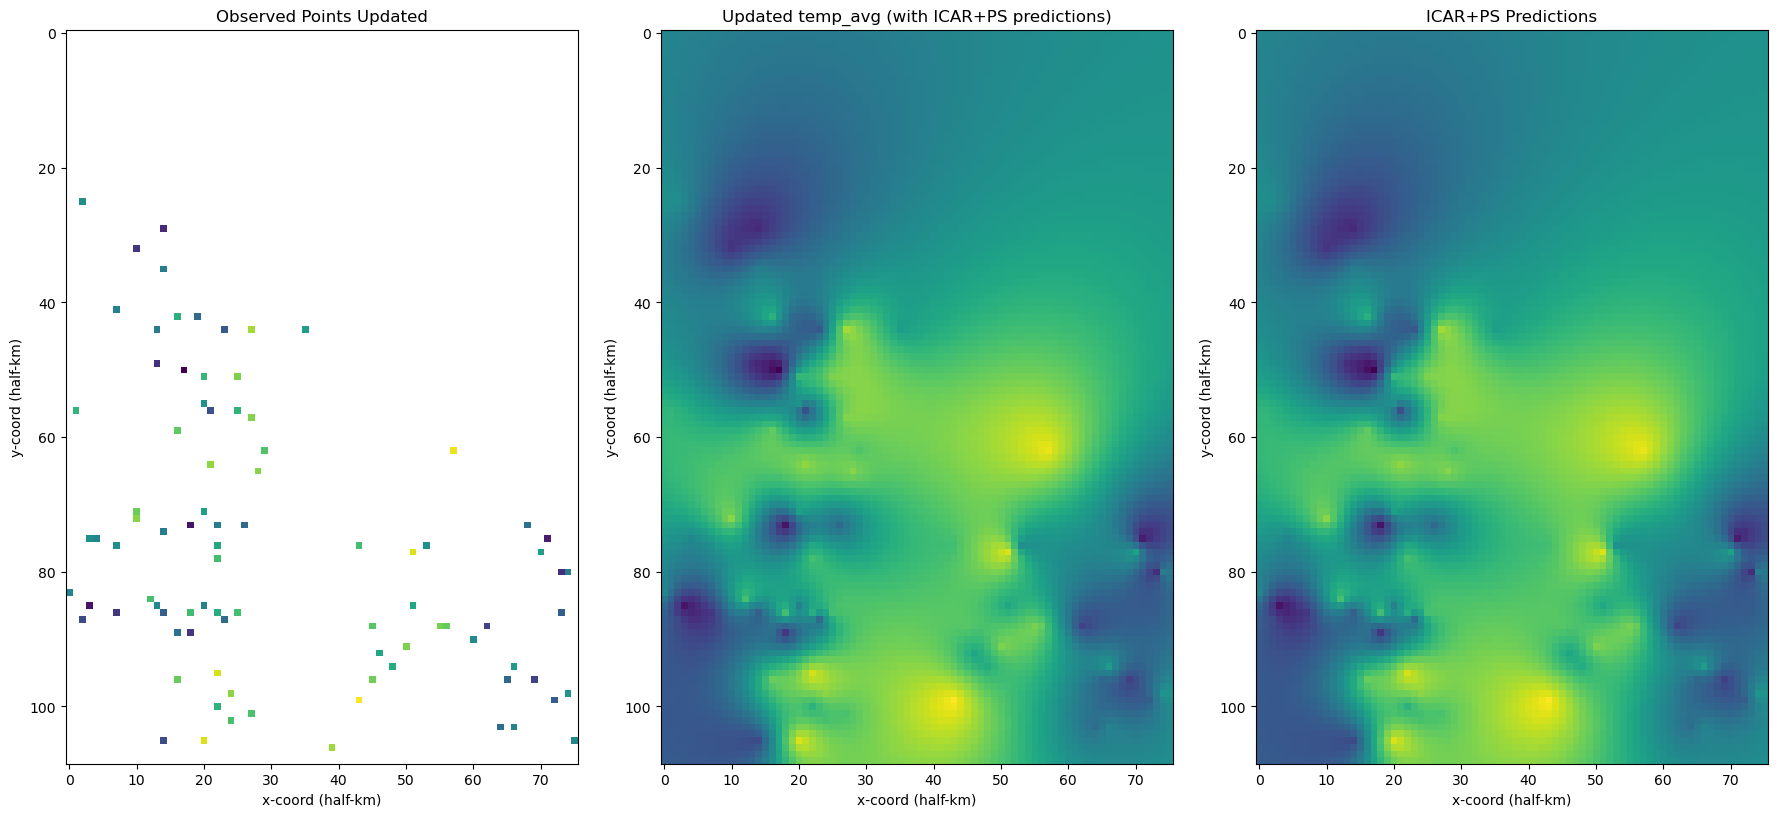

In [6]:
# NB: Zach's ICAR+PS file contains a prediction for each grid cell in the 109x76 grid.

# Let's now set the unobserved grid cells in the df to the same values as the ICAR+PS predictions.

# Initialize a dataframe that stores the grid cell indices and the temperature values (na for unobserved cells):

cells_y, cells_x = data.shape

df = pd.DataFrame(all_grid_cell_indices, columns=['grid_row', 'grid_col'])

# Initialize the 'temp_avg' column with NaN (indicating missing values initially)
df['temp_avg'] = np.nan

print(len(observed_grid_cell_indices))
print(len(unobserved_grid_cell_indices))

# First, update the 'temp_avg' column for observed grid cells
for y, x in observed_grid_cell_indices:
    # Set the temp_avg for observed points to the value from 'data'
    df.loc[(df['grid_row'] == y) & (df['grid_col'] == x), 'temp_avg'] = data[y, x]

# Check the NaN count before updating unobserved cells
print(f"NaN count before updating unobserved cells: {df['temp_avg'].isna().sum()}")
print(f"Non-NaN count before updating unobserved cells: {df['temp_avg'].notna().sum()}")

# Now, let's plot the state of the DataFrame after updating the observed cells but before adding the unobserved cells
fig, axes = plt.subplots(1, 3, figsize=(18, 8))  # 1 row, 3 columns

# Plot the observed-only updated 'temp_avg' from df (only observed points updated)
axes[0].imshow(df['temp_avg'].values.reshape(cells_y, cells_x), cmap='viridis', aspect='equal')
axes[0].set_title('Observed Points Updated')
axes[0].set_xlabel('x-coord (half-km)')
axes[0].set_ylabel('y-coord (half-km)')

# Now, update the unobserved grid cells with the ICAR+PS predictions
for y, x in unobserved_grid_cell_indices:
    # Get the prediction from icar_ps_data (note: icar_ps_data[row, col] corresponds to [y, x])
    predicted_value = icar_ps_data[y, x]
    
    # Set the temp_avg for the unobserved points to the predicted value
    df.loc[(df['grid_row'] == y) & (df['grid_col'] == x) & (df['temp_avg'].isna()), 'temp_avg'] = predicted_value

# Now, let's check if we correctly updated the 'temp_avg' column
print(f"Number of non-NaN temp_avg values: {df['temp_avg'].notna().sum()}")
print(f"Total number of grid cells: {len(df)}")


# Plot the updated 'temp_avg' after updating unobserved cells
axes[1].imshow(df['temp_avg'].values.reshape(cells_y, cells_x), cmap='viridis', aspect='equal')
axes[1].set_title('Updated temp_avg (with ICAR+PS predictions)')
axes[1].set_xlabel('x-coord (half-km)')
axes[1].set_ylabel('y-coord (half-km)')

# Plot the ICAR+PS predictions
axes[2].imshow(icar_ps_data, cmap='viridis', aspect='equal')
axes[2].set_title('ICAR+PS Predictions')
axes[2].set_xlabel('x-coord (half-km)')
axes[2].set_ylabel('y-coord (half-km)')

# Display the plots
plt.tight_layout()  # Adjust spacing between the plots
plt.show()



In [7]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

import sys
import os

# Assuming the parent directory is one level up from the current script
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)

# Now you can import from custom_dk_imports
from custom_dk_imports import DeepKrigingMLP, Trainer

# Define necessary parts from nn.py
class DeepKrigingEmbedding3d(nn.Module):
    def __init__(self, K: int):
        super(DeepKrigingEmbedding3d, self).__init__()
        self.K = K
        self.num_basis = [(9*2**(h-1)+1)**2 for h in range(1,self.K+1)]
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, s: torch.Tensor) -> torch.Tensor:
        knots_1d = [torch.linspace(0, 1, int(np.sqrt(i))).to(self.device) for i in self.num_basis]
        N = s.shape[0]
        phi = torch.zeros(N, sum(self.num_basis)).to(self.device)
        K = 0
        for res, num_basis_res in enumerate(self.num_basis):
            theta = 1 / np.sqrt(num_basis_res) * 2.5
            knots_s1, knots_s2 = torch.meshgrid(knots_1d[res], knots_1d[res], indexing='ij')
            knots = torch.stack((knots_s1.flatten(), knots_s2.flatten()), dim=1).to(self.device)
            d = torch.cdist(s, knots) / theta
            mask = (d >= 0) & (d <= 1)
            weights = torch.zeros_like(d)
            weights[mask] = ((1 - d[mask]) ** 6 * (35 * d[mask] ** 2 + 18 * d[mask] + 3) / 3)
            phi[:, K:K + num_basis_res] = weights
            K += num_basis_res
        return phi

In [8]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import sys
from custom_dk_imports import DeepKrigingMLP, Trainer, NewLoss


# extract (y, x) coordinates from 'df':
grid_points = df[['grid_row', 'grid_col']].to_numpy()
grid_points_tuples = [tuple(pt) for pt in grid_points]

print(f"Shape of grid_points: {grid_points.shape}")
for pt in grid_points_tuples[:5]:
    print(pt)

temp_values = df['temp_avg'].to_numpy()

print(f"Shape of temp_values: {temp_values.shape}")
print(f"First 5 temp values: {temp_values[:5]}")


Shape of grid_points: (8284, 2)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
Shape of temp_values: (8284,)
First 5 temp values: [30.92336692 30.91345228 30.90347219 30.89348875 30.88356934]


In [9]:
# create a dictionary for the gridpoint indices (assign an idx from 0 to 8283 for each gridpoint coord):
grid_point_idx_dict = {pt: idx for idx, pt in enumerate(grid_points_tuples)}
print(f"Number of grid points: {len(grid_point_idx_dict)}")
print(f"Index of the first grid point: {grid_point_idx_dict[grid_points_tuples[0]]}")
print(f"Index of the last grid point: {grid_point_idx_dict[grid_points_tuples[-1]]}")

# now make flattened version of observed_grid_cell_indices:
observed_grid_cell_indices_flat = []
for pt in observed_grid_cell_indices:
    observed_grid_cell_indices_flat.append(grid_point_idx_dict[pt])
observed_grid_cell_indices_flat = np.array(observed_grid_cell_indices_flat)
print(f"Shape of observed_grid_cell_indices_flat: {observed_grid_cell_indices_flat.shape}")
print(f"First 5 indices in observed_grid_cell_indices_flat: {observed_grid_cell_indices_flat[:5]}")

# Define the grid dimensions based on the 109x76 grid
cells_y, cells_x = 109, 76

# Create the grid points by meshing x and y coordinates
x = np.linspace(0, cells_x - 1, cells_x)  # Range for x-coordinates (0 to 75)
y = np.linspace(0, cells_y - 1, cells_y)  # Range for y-coordinates (0 to 108)
X, Y = np.meshgrid(x, y)  # Generate 2D meshgrid

# Flatten the 2D arrays of X and Y into 1D arrays and stack them
grid_points = np.vstack([Y.ravel(), X.ravel()]).T  # Shape will be (8284, 2)
for i in range(5):
    print(grid_points[i])

# Initialize the M array (indicator for observed/unobserved)
M = np.zeros(len(grid_points))  # Initially, all points are unobserved (0)
M[observed_grid_cell_indices_flat] = 1  # Set observed points to 1

print(f"Shape of grid_points: {grid_points.shape}")
print(f"Shape of M: {M.shape}")

# Now grid_points is (8284, 2) and M is (8284,)


Number of grid points: 8284
Index of the first grid point: 0
Index of the last grid point: 8283
Shape of observed_grid_cell_indices_flat: (88,)
First 5 indices in observed_grid_cell_indices_flat: [1902 2218 2442 2674 3123]
[0. 0.]
[0. 1.]
[0. 2.]
[0. 3.]
[0. 4.]
Shape of grid_points: (8284, 2)
Shape of M: (8284,)


s_train mean: [0.50077405 0.49888637], std: [0.29032544 0.29404172]
s_train min: [0. 0.], max: [1. 1.]
y_train mean: -0.00015715424624986987, std: 1.0000387276732061
y_train min: -3.1689432088490865, max: 2.609353869359781
phi_train mean: 0.003130152588710189, std: 0.039940882474184036
phi_train min: 0.0, max: 1.0


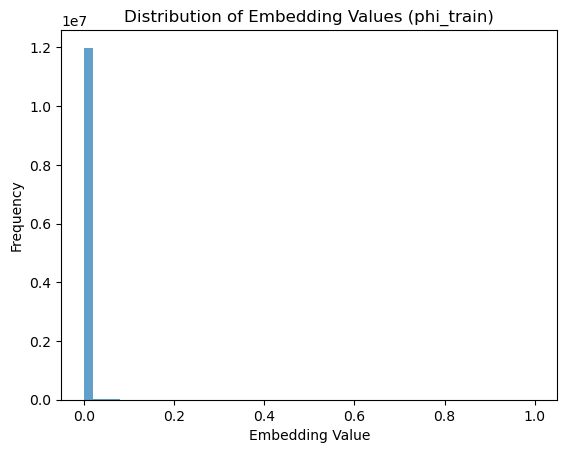

In [10]:
s_train, s_val, y_train, y_val, M_train, M_val = train_test_split(grid_points, temp_values, M, test_size=0.2, random_state=42)
s_test = grid_points  # Use the full grid as the test set

# Convert M_train and M_val back to torch tensors
M_train = torch.tensor(M_train, dtype=torch.float32)
M_val = torch.tensor(M_val, dtype=torch.float32)

# Define model parameters
num_hidden_layers = 1
hidden_dims = 100
K = 3  # embedding layer will update K based on DeepKrigingEmbedding3d

# Instantiate the embedding layer
embedding_layer = DeepKrigingEmbedding3d(K)
input_dim = sum(embedding_layer.num_basis)  # This should match 1830

# Normalize s-coords
s_min, s_max = grid_points.min(axis=0), grid_points.max(axis=0)
s_train = (s_train - s_min) / (s_max - s_min)
s_val = (s_val - s_min) / (s_max - s_min)
s_test = (s_test - s_min) / (s_max - s_min)

print(f"s_train mean: {s_train.mean(axis=0)}, std: {s_train.std(axis=0)}")
print(f"s_train min: {s_train.min(axis=0)}, max: {s_train.max(axis=0)}")


# Compute the mean and standard deviation of temp_values
y_mean = temp_values.mean()
y_std = temp_values.std()

# Normalize temperature values
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (temp_values - y_mean) / y_std

print(f"y_train mean: {y_train.mean()}, std: {y_train.std()}")
print(f"y_train min: {y_train.min()}, max: {y_train.max()}")

# Convert numpy arrays to torch tensors
s_train_tensor = torch.tensor(s_train, dtype=torch.float32)
s_val_tensor = torch.tensor(s_val, dtype=torch.float32)
s_test_tensor = torch.tensor(s_test, dtype=torch.float32)
s_all_tensor = torch.tensor(grid_points, dtype=torch.float32)
# print(s_train_tensor)

embedding_layer.eval()
# Compute the basis functions for each split using the tensor inputs
phi_train = embedding_layer(s_train_tensor)
phi_val = embedding_layer(s_val_tensor)
phi_test = embedding_layer(s_test_tensor)
phi_all = embedding_layer(s_all_tensor)

print(f"phi_train mean: {phi_train.mean().item()}, std: {phi_train.std().item()}")
print(f"phi_train min: {phi_train.min().item()}, max: {phi_train.max().item()}")

import matplotlib.pyplot as plt

phi_train_np = phi_train.detach().cpu().numpy().flatten()
plt.hist(phi_train_np, bins=50, alpha=0.7)
plt.title("Distribution of Embedding Values (phi_train)")
plt.xlabel("Embedding Value")
plt.ylabel("Frequency")
plt.show()

# Convert y_train, y_val, and y_test to torch tensors
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(temp_values, dtype=torch.float32).view(-1, 1)
y_all_tensor = torch.tensor(temp_values, dtype=torch.float32).view(-1, 1)


deepkriging_model = DeepKrigingMLP(input_dim, num_hidden_layers, hidden_dims, K=K, activation='relu')

train_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(phi_train, y_train),
    batch_size=32, shuffle=True
)

val_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(phi_val, y_val),
    batch_size=32, shuffle=False
)

test_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(phi_test, y_test),
    batch_size=32, shuffle=False
)

data_generators = {'train': train_loader, 'val': val_loader, 'test': test_loader}

Training started:

Epoch 1/100
Learning rate: 0.001000
1s for 208 steps - 2ms/step - loss 0.9103
Validation:
0s - loss 0.7563

Epoch 2/100
Learning rate: 0.001000
0s for 208 steps - 1ms/step - loss 0.7515
Validation:
0s - loss 0.7515

Epoch 3/100
Learning rate: 0.001000
0s for 208 steps - 1ms/step - loss 0.7500
Validation:
0s - loss 0.7502

Epoch 4/100
Learning rate: 0.001000
0s for 208 steps - 1ms/step - loss 0.7517
Validation:
0s - loss 0.7496

Epoch 5/100
Learning rate: 0.001000
0s for 208 steps - 1ms/step - loss 0.7493
Validation:
0s - loss 0.7500

Epoch 6/100
Learning rate: 0.001000
0s for 208 steps - 1ms/step - loss 0.7471
Validation:
0s - loss 0.7494

Epoch 7/100
Learning rate: 0.001000
0s for 208 steps - 1ms/step - loss 0.7476
Validation:
0s - loss 0.7493

Epoch 8/100
Learning rate: 0.001000
0s for 208 steps - 1ms/step - loss 0.7472
Validation:
0s - loss 0.7487

Epoch 9/100
Learning rate: 0.001000
0s for 208 steps - 1ms/step - loss 0.7466
Validation:
0s - loss 0.7487

Epoch 10/

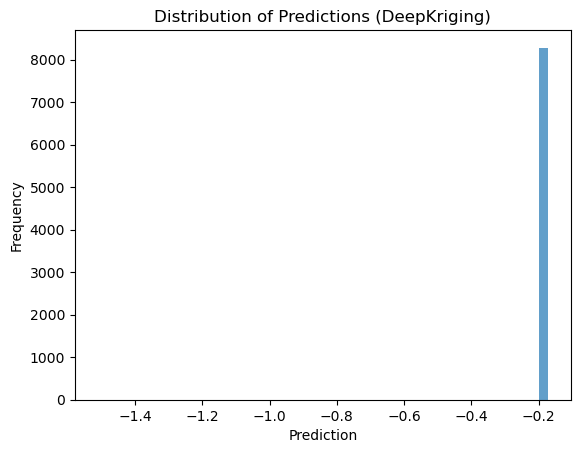

In [11]:
from custom_dk_imports import NewLoss
trainer = Trainer(
    model=deepkriging_model,
    data_generators={'train': train_loader, 'val': val_loader, 'test': test_loader},
    optim='adam',
    optim_params={'lr': 0.001},
    loss_fn=NewLoss(s_all=grid_points, observed_indices=observed_grid_cell_indices_flat, y_all=temp_values),
    # loss_fn=nn.MSELoss(),
    M_train=M_train,
    M_val=M_val,
    window_size=10,
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    epochs=100,
    patience=10
)

trainer.train()

deepkriging_model.eval()

with torch.no_grad():
    y_pred_deepkriging = deepkriging_model(phi_all).cpu().numpy()

print(f"y_pred_deepkriging shape: {y_pred_deepkriging.shape}")
print(f"First few predictions: {y_pred_deepkriging[:5]}")

plt.hist(y_pred_deepkriging, bins=50, alpha=0.7)
plt.title("Distribution of Predictions (DeepKriging)")
plt.xlabel("Prediction")
plt.ylabel("Frequency")
plt.show()


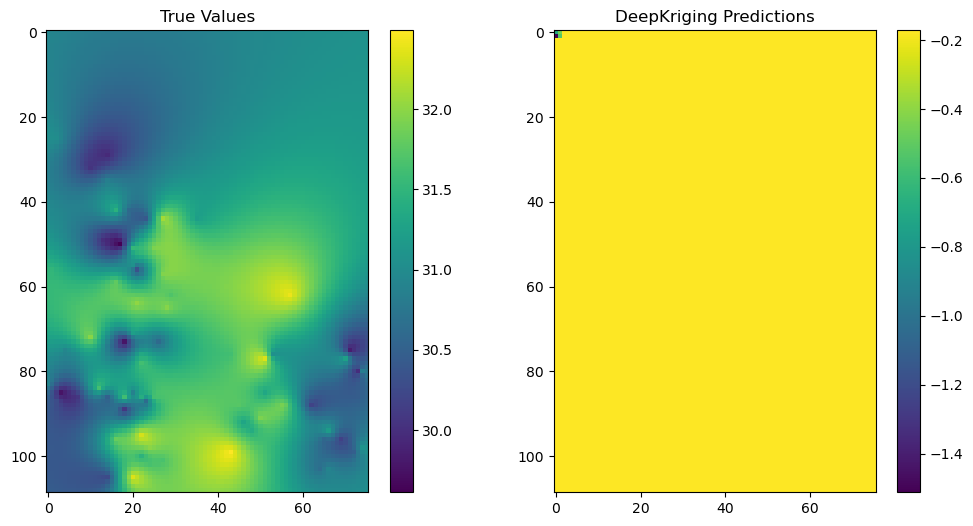

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(temp_values.reshape(109, 76), cmap='viridis')
plt.title('True Values')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(y_pred_deepkriging.reshape(109, 76), cmap='viridis')
plt.title('DeepKriging Predictions')
plt.colorbar()

plt.show()


In [13]:
noise_var = 0.01  # Nugget variance

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern

kernel = 1 * Matern(length_scale=0.1, nu=1.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_var)

gp.fit(s_train[M_train.numpy().astype(bool)], y_train[M_train.numpy().astype(bool)])   
y_pred_gp, y_std_gp = gp.predict(grid_points, return_std=True)

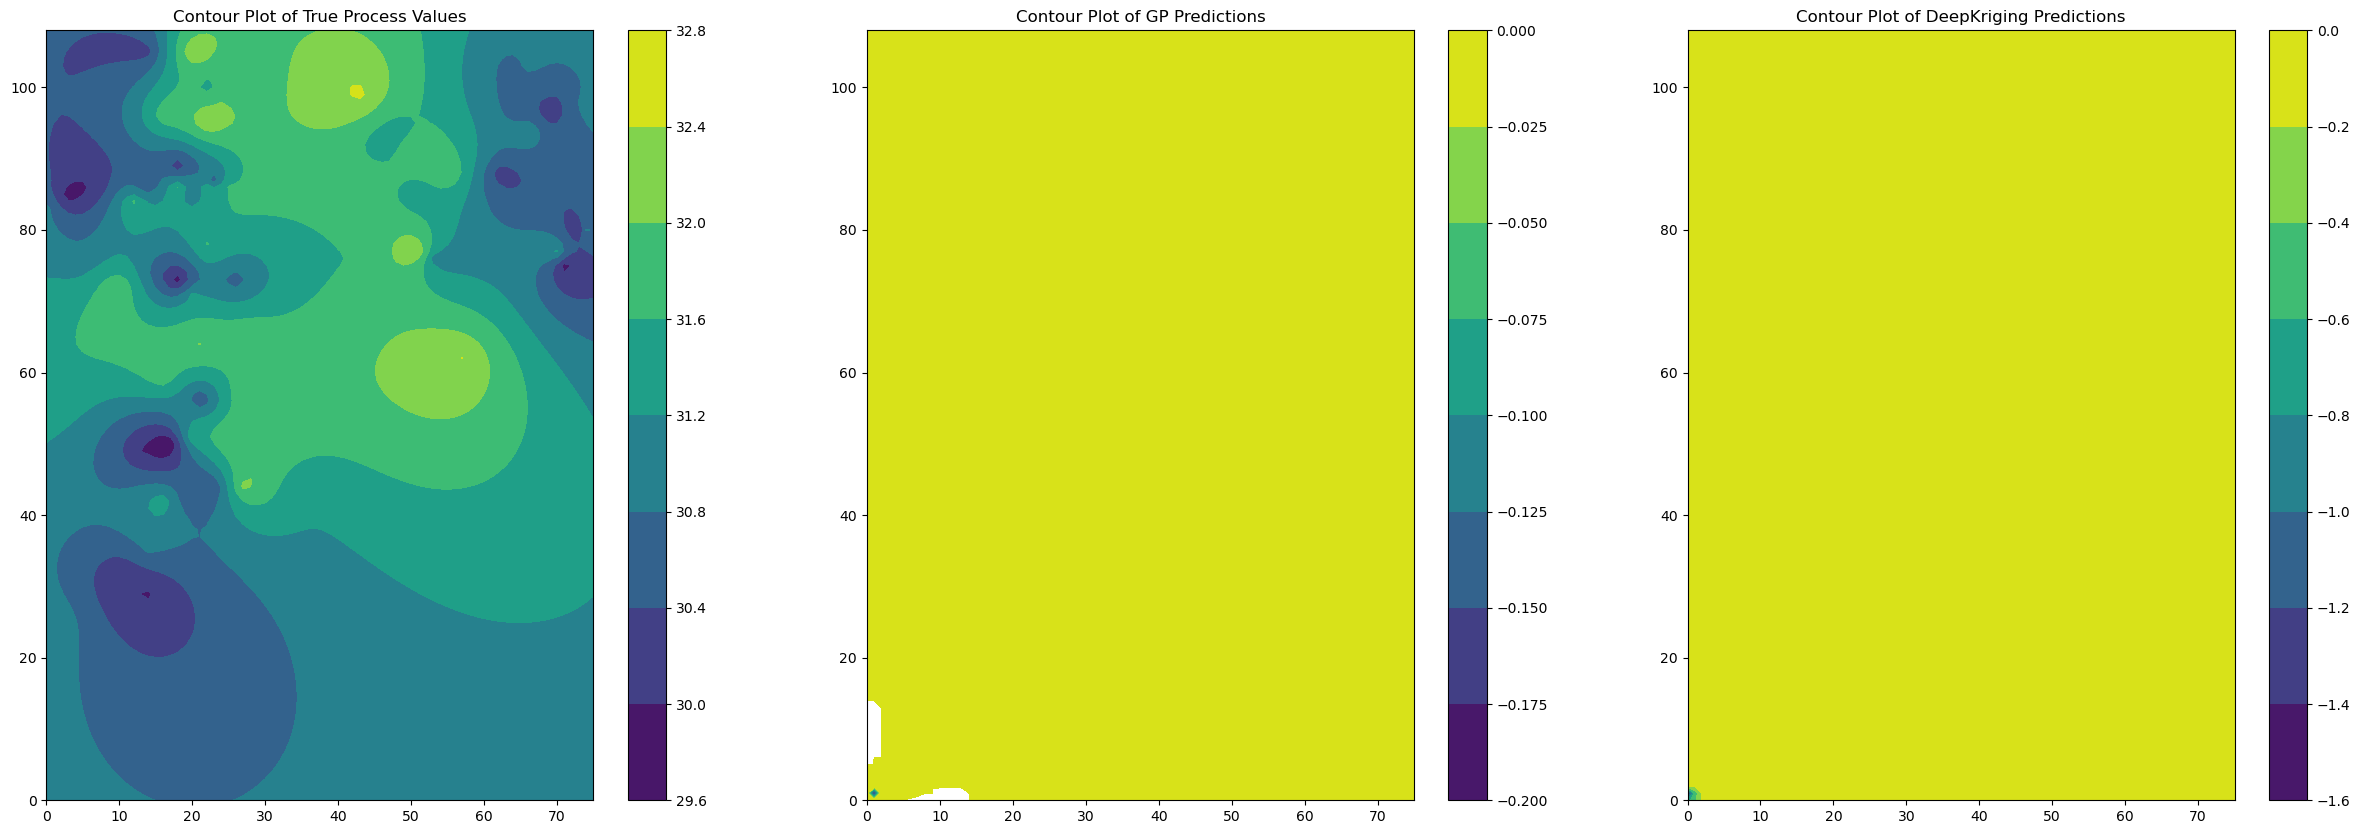

In [14]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(30, 10))
gs = gridspec.GridSpec(1, 3)
ax = plt.subplot(gs[0, 0])

X = np.arange(0, 76, 1)
Y = np.arange(0, 109, 1)
process_values_grid = temp_values.reshape(109, 76)

contour1 = ax.contourf(X, Y, process_values_grid, cmap='viridis')
cbar1 = plt.colorbar(contour1, ax=ax)
ax.set_title("Contour Plot of True Process Values")

ax = plt.subplot(gs[0, 1])
# # Plot DeepKriging predictions directly on the test points
contour2 = ax.contourf(X, Y, y_pred_gp.reshape(109, 76), cmap='viridis')
cbar2 = plt.colorbar(contour2, ax=ax)
ax.set_title("Contour Plot of GP Predictions")

ax = plt.subplot(gs[0, 2])
# # Plot GP predictions directly on the test points
contour3 = ax.contourf(X, Y, y_pred_deepkriging.reshape(109, 76), cmap='viridis')
cbar3 = plt.colorbar(contour3, ax=ax)
ax.set_title("Contour Plot of DeepKriging Predictions")



plt.show()